## Interpolação

### Método das diferenças divididas de Newton

$$ p(x) = a_{1} + a_{2}(x-x_{1})+a_{3}(x-x_{1})(x-x_{2})+...+a_{n}(x-x1)(x-x_2)...(x-x_{n-1}) $$

**Problema:** Faça uma estimativa de $ln\space2$ com um polinômio interpolador de Newton de terceiro grau.

|x|f(x)|
|--|--|
|1|0|
|4|1,386294|
|5|1,609438|
|6|1,791759|

In [2]:
import numpy as np
import sympy as sy
from sympy.abc import x
import matplotlib.pyplot as plt
sy.init_printing(pretty_print=True)

In [3]:
x_n = np.array([1,4,5,6], dtype="double")  
y = np.array([0,1.386294,1.609438,1.791759], dtype="double")

In [4]:
def coef(x,fx):
    n=np.shape(x)[0]
    M = np.zeros((n,n))
    M[:,0]=fx
    for j in range(1,n):
        for i in range(j,n):
            M[i,j]=(M[i,j-1]-M[i-1,j-1])/(x[i]-x[i-j])
    return np.diag(M)

In [5]:
c=coef(x_n,y);c

array([ 0.       ,  0.462098 , -0.0597385,  0.0078654])

In [6]:
def symbols(n,var):                  
    V = []
    for i in range(0,n):
        v = var + str(i)
        V.append(sy.Symbol(v))
    return V

In [8]:
n=np.shape(c)[0]
d=symbols(n,'a');d

In [9]:
x_v=symbols(n-1,'x');x_v

In [10]:
def polyn(d,x_s):
    px=d[0]
    n=len(d)
    aux=1
    for i in range(1,n):
        aux*=(x-x_s[i-1])
        px+=d[i]*aux
    return px

In [11]:
px=polyn(d,x_v);px

In [12]:
s=[]
n=len(d)
for i in range(n):
    for j in range(n):
        if(i==j):
            s.append((d[i],c[j]))
n=len(x_v)
for i in range(n):
    for j in range(n):
        if(i==j):
            s.append((x_v[i],x_n[j]))
s

In [13]:
px=px.subs(s)
px

In [14]:
p=sy.Poly(px);p

In [15]:
pn=p.subs(x,2);pn

In [16]:
f=sy.lambdify(x,px,'numpy')

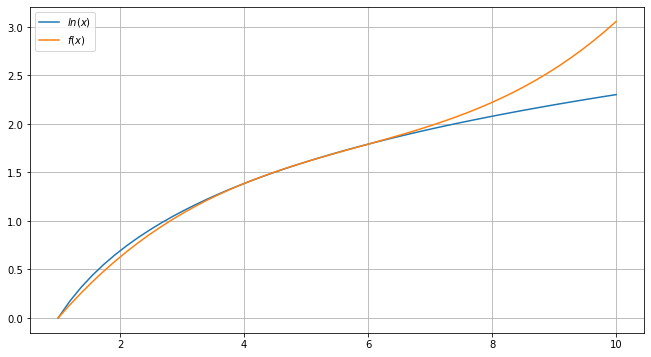

In [17]:
x=np.linspace(1,10)
fig=plt.figure(figsize=(11,6))
plt.grid()
plt.plot(x,np.log(x))
plt.plot(x,f(x))
_=plt.legend(['$ln(x)$','$f(x)$'],loc='best')

## Interpolador de Lagrange

$$ L_{k}(x)= \prod_{j=1,\space j{\neq}i}^{n}\dfrac{x-x_{j}}{x_{k}-x_{j}} $$

In [18]:
x_n = np.array([1,4,5,6], dtype="double")  
y = np.array([0,1.386294,1.609438,1.791759], dtype="double")
x=sy.Symbol('x')

In [19]:
x_v=symbols(4,'x');x_v

In [21]:
n=len(x_v)
L=[1 for i in range(n)]
for j in range(n):
    for i in range(n):
        if i == j:
            continue
        L[j]*=((x-x_n[i])/(x_n[j]-x_n[i]))
L

In [22]:
for i in L:
    print(i)

(1.2 - 0.2*x)*(1.25 - 0.25*x)*(1.33333333333333 - 0.333333333333333*x)
(3.0 - 0.5*x)*(5.0 - 1.0*x)*(0.333333333333333*x - 0.333333333333333)
(6.0 - 1.0*x)*(0.25*x - 0.25)*(1.0*x - 4.0)
(0.2*x - 0.2)*(0.5*x - 2.0)*(1.0*x - 5.0)


In [23]:
px=L[0]*y[0]
for i in range(1,4):
    px+=L[i]*y[i]
px

In [24]:
p=sy.Poly(px);p

In [25]:
px.subs(x,2)

In [26]:
f=sy.lambdify(x,px,'numpy')

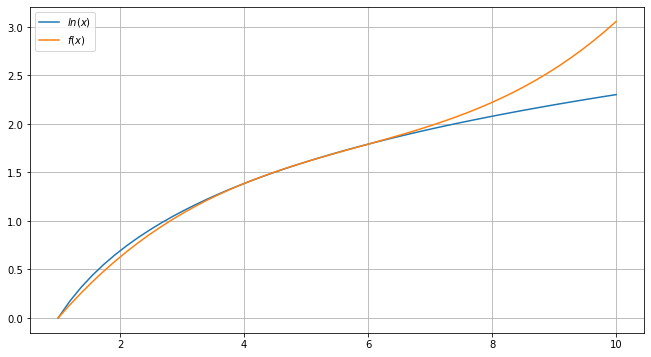

In [27]:
x=np.linspace(1,10)
fig=plt.figure(figsize=(11,6))
plt.grid()
plt.plot(x,np.log(x))
plt.plot(x,f(x))
_=plt.legend(['$ln(x)$','$f(x)$'],loc='best')